In [51]:
import pandas as pd

df = pd.read_csv('../data/dataset-2.csv')

In [52]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
16,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,1,Male,80,4,1,Research Scientist,2,Divorced,3298,15053,0,Y,Yes,12,3,4,80,2,7,5,2,6,2,0,5
102,20,Yes,Travel_Frequently,871,Research & Development,6,3,Life Sciences,1,137,4,Female,66,2,1,Laboratory Technician,4,Single,2926,19783,1,Y,Yes,18,3,2,80,0,1,5,3,1,0,1,0
1167,35,Yes,Travel_Rarely,763,Sales,15,2,Medical,1,1645,1,Male,59,1,2,Sales Executive,4,Divorced,5440,22098,6,Y,Yes,14,3,4,80,2,7,2,2,2,2,2,2
81,35,No,Travel_Rarely,1214,Research & Development,1,3,Medical,1,105,2,Male,30,2,1,Research Scientist,3,Single,2859,26278,1,Y,No,18,3,1,80,0,6,3,3,6,4,0,4
723,46,No,Travel_Rarely,566,Research & Development,7,2,Medical,1,1007,4,Male,75,3,3,Manufacturing Director,3,Divorced,10845,24208,6,Y,No,13,3,2,80,1,13,3,3,8,7,0,7


In [53]:
pd.set_option('display.max_columns', None) # Display any number of columns

In [54]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
730,30,No,Travel_Rarely,153,Research & Development,8,2,Life Sciences,1,1015,2,Female,73,4,3,Research Director,1,Married,11416,17802,0,Y,Yes,12,3,3,80,3,9,4,2,8,7,1,7
691,40,No,Travel_Frequently,1469,Research & Development,9,4,Medical,1,964,4,Male,35,3,1,Research Scientist,2,Divorced,3617,25063,8,Y,Yes,14,3,4,80,1,3,2,3,1,1,0,0
941,30,No,Travel_Rarely,1138,Research & Development,6,3,Technical Degree,1,1311,1,Female,48,2,2,Laboratory Technician,4,Married,4627,23631,0,Y,No,12,3,1,80,1,10,6,3,9,2,6,7
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
669,39,Yes,Travel_Rarely,1122,Research & Development,6,3,Medical,1,932,4,Male,70,3,1,Laboratory Technician,1,Married,2404,4303,7,Y,Yes,21,4,4,80,0,8,2,1,2,2,2,2


In [55]:
df_work = df

In [56]:
df_work.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
df_work.shape

(1470, 35)

In [58]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
df_work.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
df_work.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [61]:
df_work.duplicated().any()

False

In [62]:
df_work.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
326,39,No,Travel_Frequently,672,Research & Development,7,2,Medical,1,444,3,Male,54,2,5,Manager,4,Married,19272,21141,1,Y,No,15,3,1,80,1,21,2,3,21,9,13,3
938,58,No,Travel_Rarely,848,Research & Development,23,4,Life Sciences,1,1308,1,Male,88,3,1,Research Scientist,3,Divorced,2372,26076,1,Y,No,12,3,4,80,2,2,3,3,2,2,2,2
1253,33,No,Non-Travel,1283,Sales,2,3,Marketing,1,1756,4,Female,62,3,2,Sales Executive,2,Single,5147,10697,8,Y,No,15,3,4,80,0,13,2,2,11,7,1,7
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
213,51,No,Travel_Rarely,1469,Research & Development,8,4,Life Sciences,1,296,2,Male,81,2,3,Research Director,2,Married,12490,15736,5,Y,No,16,3,4,80,2,16,5,1,10,9,4,7


In [63]:
df_work['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<Axes: xlabel='Attrition'>

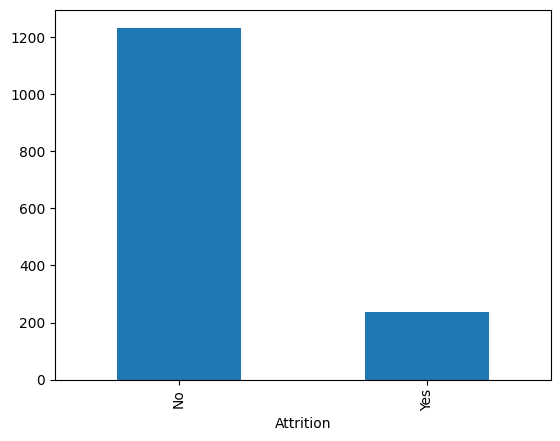

In [64]:
df_work['Attrition'].value_counts().plot(kind='bar')

In [65]:
df_work['Attrition'] = df_work['Attrition'].map({'No': 0, 'Yes': 1})

In [66]:
df_work['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [67]:
X = df_work.drop(columns=['Attrition'])

In [68]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [69]:
y = df_work['Attrition']

In [70]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [71]:
X.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,40,Travel_Rarely,1137,Research & Development,1,4,Life Sciences,1,1892,1,Male,98,3,4,Manager,1,Divorced,16823,18991,2,Y,No,11,3,1,80,1,22,3,3,19,7,11,16
409,42,Travel_Frequently,532,Research & Development,29,2,Life Sciences,1,547,1,Female,92,3,2,Research Scientist,3,Divorced,4556,12932,2,Y,No,11,3,2,80,1,19,3,3,5,4,0,2
1388,32,Non-Travel,1146,Research & Development,15,4,Medical,1,1955,3,Female,34,3,2,Healthcare Representative,4,Divorced,6667,16542,5,Y,No,18,3,2,80,1,9,6,3,5,1,1,2
796,25,Travel_Rarely,1219,Research & Development,4,1,Technical Degree,1,1106,4,Male,32,3,1,Laboratory Technician,4,Married,3691,4605,1,Y,Yes,15,3,2,80,1,7,3,4,7,7,5,6
909,19,Travel_Rarely,265,Research & Development,25,3,Life Sciences,1,1269,2,Female,57,4,1,Research Scientist,4,Single,2994,21221,1,Y,Yes,12,3,4,80,0,1,2,3,1,0,0,1


In [72]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [73]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [74]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [75]:
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [76]:
df_work['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [77]:
df_work['Over18'].unique()

array(['Y'], dtype=object)

In [78]:
X = X.drop(columns=['Over18'])

In [79]:
X.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [80]:
X['OverTime'] = X['OverTime'].map({'No': 0, 'Yes': 1})

In [81]:
X.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
50,48,Travel_Rarely,626,Research & Development,1,2,Life Sciences,1,64,1,Male,98,2,3,Laboratory Technician,3,Single,5381,19294,9,1,13,3,4,80,0,23,2,3,1,0,0,0
892,19,Non-Travel,504,Research & Development,10,3,Medical,1,1248,1,Female,96,2,1,Research Scientist,2,Single,1859,6148,1,1,25,4,2,80,0,1,2,4,1,1,0,0
604,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,Male,98,3,2,Manufacturing Director,2,Married,4434,11806,1,0,13,3,4,80,1,10,3,2,9,8,7,8
1286,40,Travel_Rarely,616,Research & Development,2,2,Life Sciences,1,1802,3,Female,99,3,1,Laboratory Technician,1,Married,3377,25605,4,0,17,3,4,80,1,7,5,2,4,3,0,2
416,38,Travel_Frequently,1490,Research & Development,2,2,Life Sciences,1,556,4,Male,42,3,1,Laboratory Technician,4,Married,1702,12106,1,1,23,4,3,80,1,1,3,3,1,0,0,0


In [82]:
X['EmployeeCount'].unique()

array([1], dtype=int64)

In [83]:
X = X.drop(columns=['EmployeeCount'])

In [84]:
X.sample(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1109,30,Travel_Rarely,1288,Sales,29,4,Technical Degree,1568,3,Male,33,3,3,Sales Executive,2,Married,9250,17799,3,0,12,3,2,80,1,9,3,3,4,2,1,3
366,41,Travel_Frequently,143,Sales,4,3,Marketing,488,1,Male,56,3,2,Sales Executive,2,Single,9355,9558,1,0,18,3,3,80,0,8,5,3,8,7,7,7


c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `n

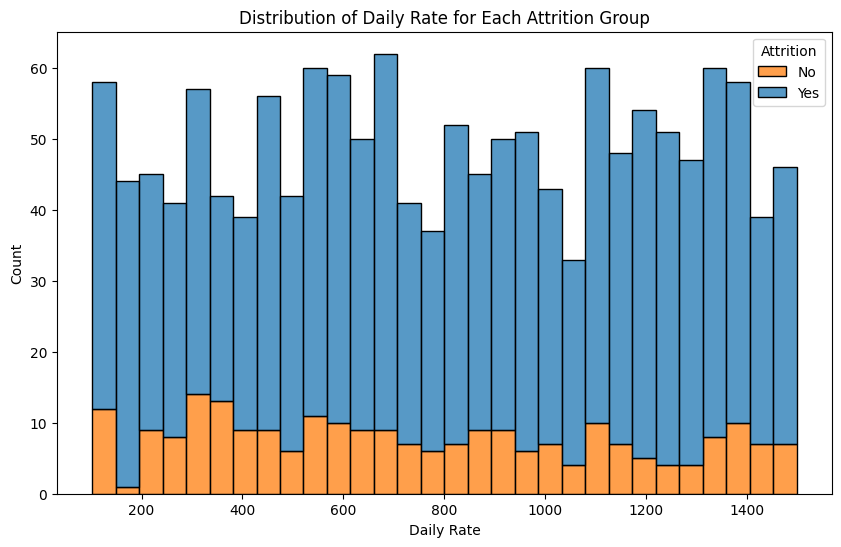

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_work, x='DailyRate', hue='Attrition', multiple='stack', bins=30)

plt.title('Distribution of Daily Rate for Each Attrition Group')
plt.xlabel('Daily Rate')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

In [45]:
X = X.drop(columns=['EmployeeNumber'])

In [46]:
X.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7


In [49]:
X['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

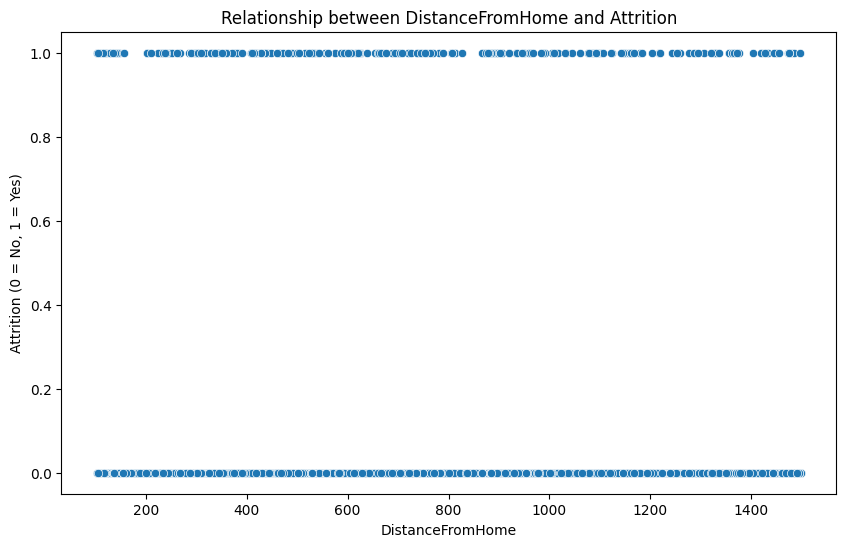

In [50]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_work, x='DailyRate', y='Attrition')

# Setting plot title and labels
plt.title('Relationship between DistanceFromHome and Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('Attrition (0 = No, 1 = Yes)')

# Show plot
plt.show()

In [38]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [39]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define the numerical columns and their corresponding data types
numerical_cols = ['satisfaction', 'last_evaluation', 'n_projects', 'avg_monthly_hrs', 'tenure']

# Define the categorical columns and their corresponding data types
categorical_cols = ['department', 'filed_complaint', 'recently_promoted']

# Create lists for transformers based on data types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('nominal', categorical_transformer, categorical_cols),
    ('ordinal', ordinal_transformer, ['salary'])
], remainder='passthrough')

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Classifier: Logistic Regression


Accuracy: 0.7637578616352201
Precision: 0.5396341463414634
Recall: 0.2822966507177033
F1-Score: 0.3706806282722513
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1917
           1       0.54      0.28      0.37       627

    accuracy                           0.76      2544
   macro avg       0.67      0.60      0.61      2544
weighted avg       0.73      0.76      0.74      2544



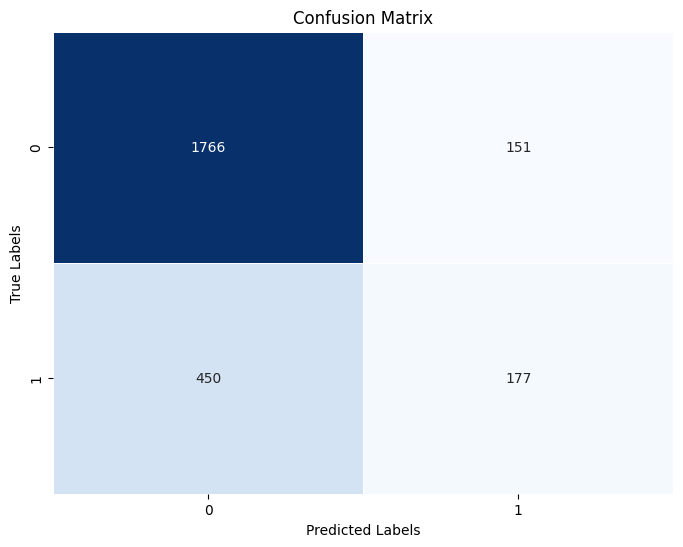



AUC-ROC Score: 0.802982464460102




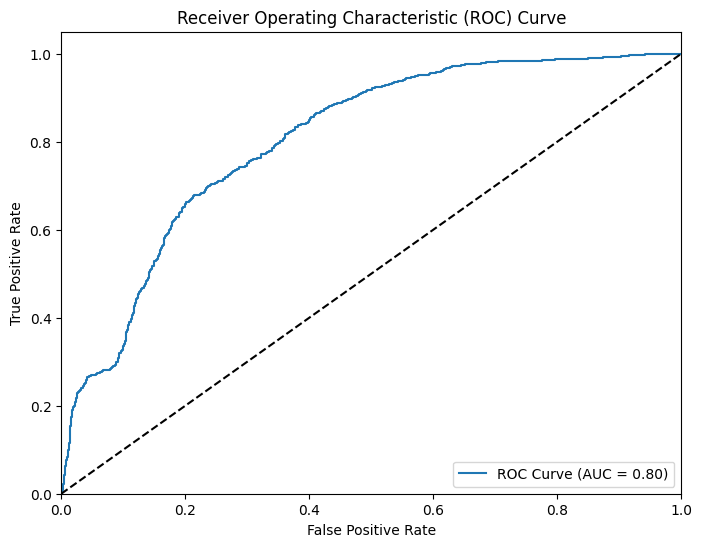



Classifier: Decision Tree


Accuracy: 0.9650157232704403
Precision: 0.926984126984127
Recall: 0.9314194577352473
F1-Score: 0.9291964996022275
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1917
           1       0.93      0.93      0.93       627

    accuracy                           0.97      2544
   macro avg       0.95      0.95      0.95      2544
weighted avg       0.97      0.97      0.97      2544



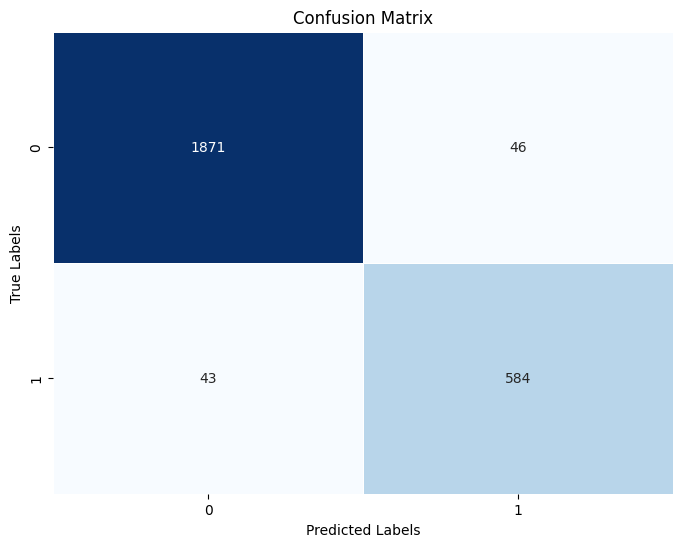



AUC-ROC Score: 0.9537118154612595




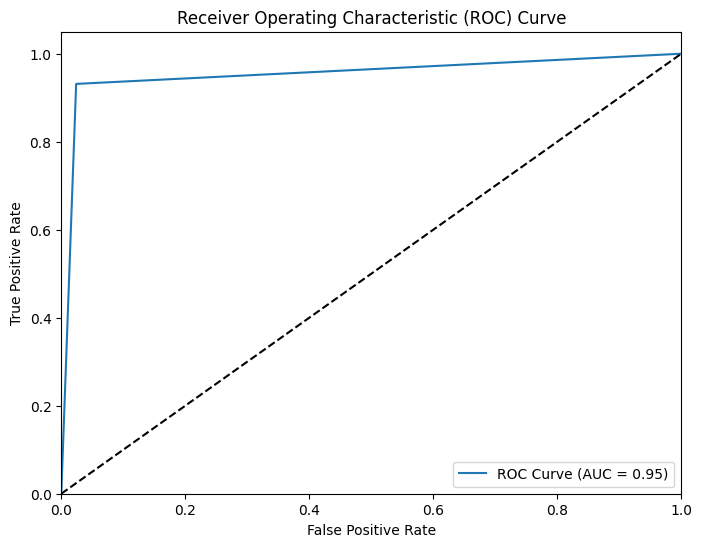



Classifier: XGBoost


Accuracy: 0.9752358490566038
Precision: 0.97
Recall: 0.9282296650717703
F1-Score: 0.9486552567237164
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1917
           1       0.97      0.93      0.95       627

    accuracy                           0.98      2544
   macro avg       0.97      0.96      0.97      2544
weighted avg       0.98      0.98      0.98      2544



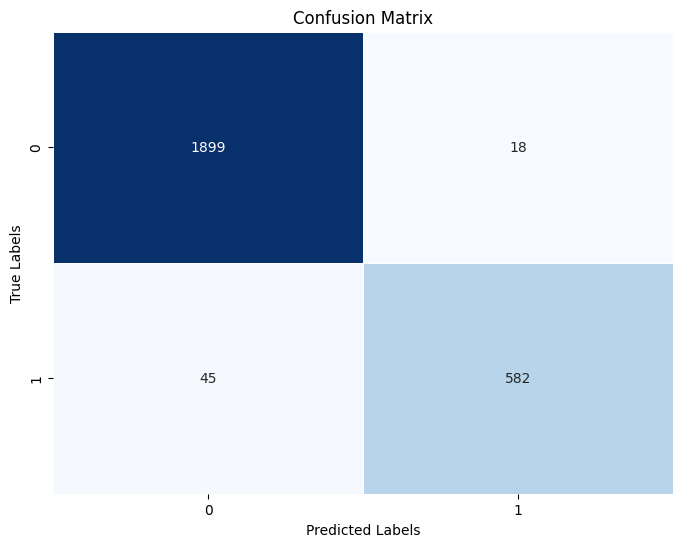



AUC-ROC Score: 0.9891801633832767




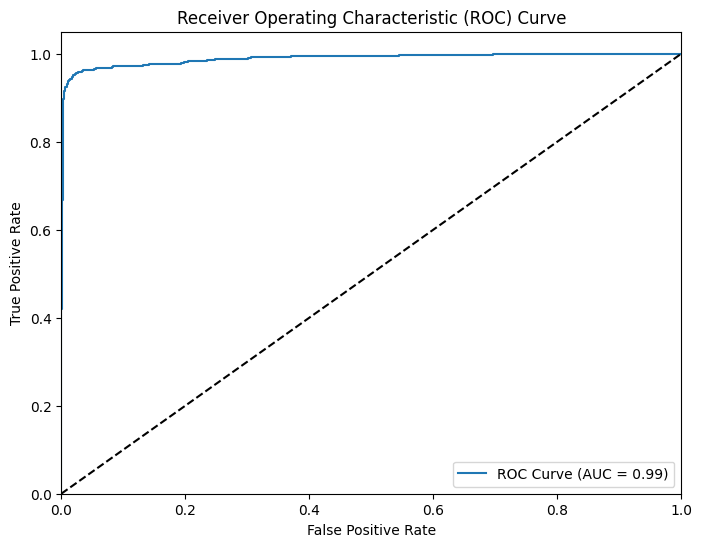



Classifier: Random Forest


Accuracy: 0.976808176100629
Precision: 0.9829931972789115
Recall: 0.9218500797448166
F1-Score: 0.951440329218107
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1917
           1       0.98      0.92      0.95       627

    accuracy                           0.98      2544
   macro avg       0.98      0.96      0.97      2544
weighted avg       0.98      0.98      0.98      2544



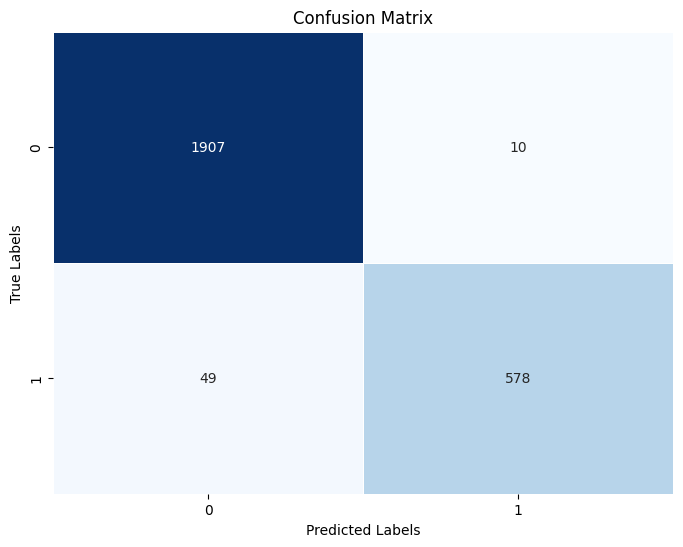



AUC-ROC Score: 0.9924456657839411




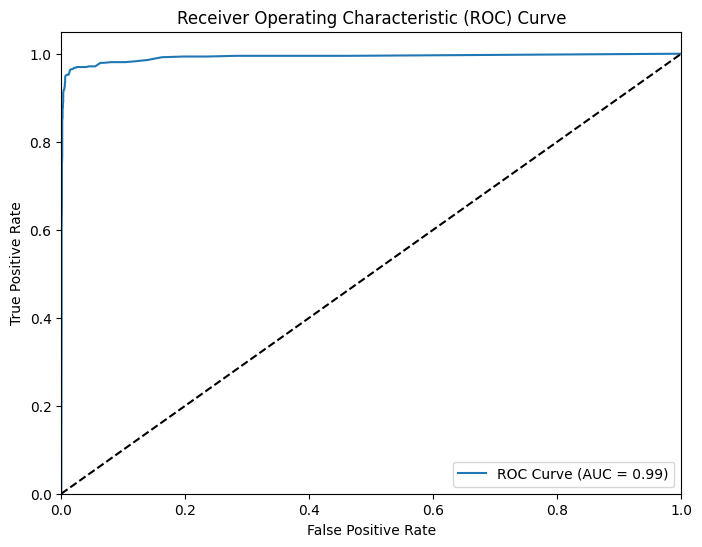

In [38]:
# Define a function for training and evaluating a classifier
def train_evaluate_classifier(classifier, classifier_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\033[1mClassifier: {classifier_name}\033[0m")  # Print the classifier name in bold
    print('\n')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Display the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Calculate the AUC-ROC Score
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC Score: {roc_auc}")
    print('\n')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')

# List of classifiers to test along with their names
classifiers_to_test = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (XGBClassifier(), "XGBoost"),
    (RandomForestClassifier(), "Random Forest")
]

# Loop through the classifiers and evaluate them
for classifier, classifier_name in classifiers_to_test:
    train_evaluate_classifier(classifier, classifier_name)

In [39]:
# Building a pipeline with the champion model - Random Forest Classifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=0))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction',
                                                   'last_evaluation',
                                                   'n_projects',
                                                   'avg_monthly_hrs',
                                                   'tenure']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['department',
                                                   'filed_complaint',
                                                   'recently_promoted']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [40]:
# Create a DataFrame with the new data for prediction
sample_data = pd.DataFrame({
    'satisfaction': [0.127],             # Corresponds to 'satisfaction' column
    'last_evaluation': [0.834],          # Corresponds to 'last_evaluation' column
    'n_projects': [6],                  # Corresponds to 'n_projects' column
    'avg_monthly_hrs': [283],           # Corresponds to 'avg_monthly_hrs' column
    'tenure': [4],                      # Corresponds to 'tenure' column
    'filed_complaint': ['Yes'],          # Corresponds to 'filed_complaint' column
    'recently_promoted': ['Missing'],        # Corresponds to 'recently_promoted' column
    'department': ['engineering'],            # Use the appropriate department
    'salary': ['low']                   # Use the appropriate salary level
})

# Preprocess and make predictions using your existing pipeline
predicted_label = pipeline.predict(sample_data)

# Display the result
if predicted_label[0] == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")


An Employee may leave the organization


In [41]:
import joblib

joblib.dump(pipeline, '../models/dataset-1_model_rf.pkl')

['../models/dataset-1_model_rf.pkl']